
## Predictive modeling of customer bookings



### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [35]:
import pandas as pd

In [36]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [37]:
bookings = df['booking_complete'].sum()
print(f"Total sum of bookings completed: {bookings}")


Total sum of bookings completed: 7478


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

Below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [39]:
na_values = df.isna().sum()

print(na_values)


num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64


In [40]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [41]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [42]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [43]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


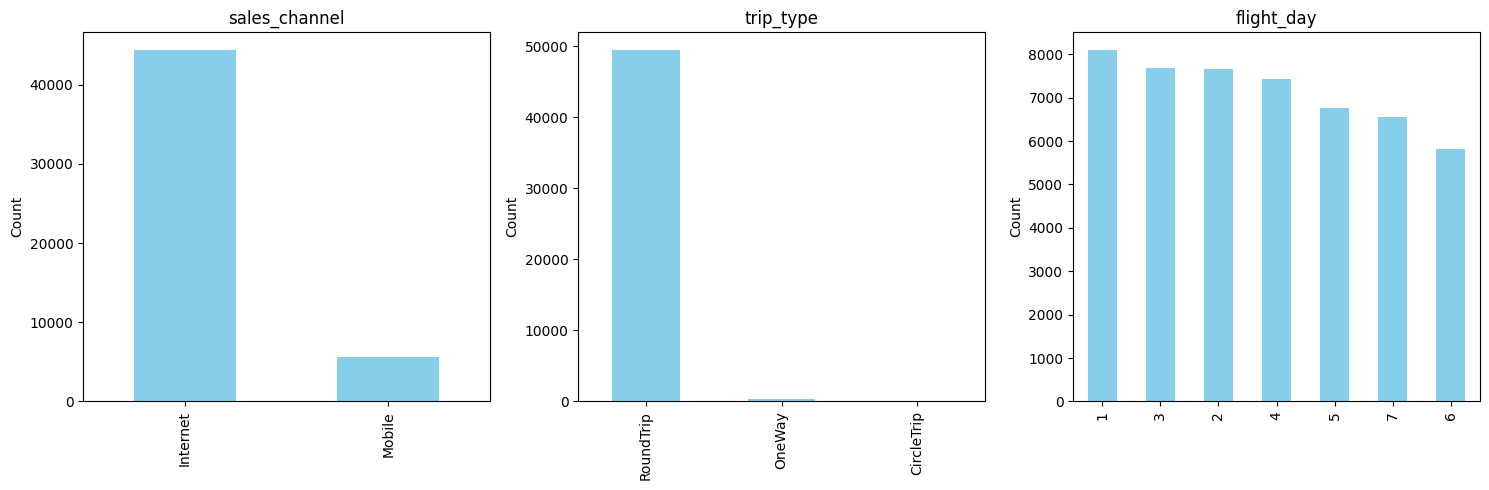

In [44]:
import matplotlib.pyplot as plt

categorical_features = ['sales_channel', 'trip_type', 'flight_day']

# Set the size for your overall figure
plt.figure(figsize=(15, 5))

# Loop through each categorical feature and create a subplot for each
for idx, feature in enumerate(categorical_features, start=1):
    plt.subplot(1, len(categorical_features), idx)
    df[feature].value_counts().plot(kind='bar', color='skyblue')
    plt.title(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


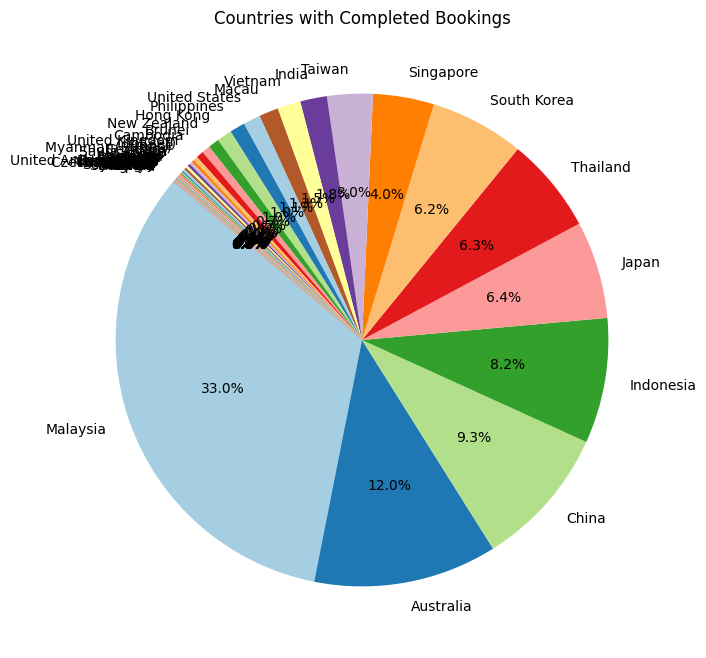

In [34]:
# Filter the dataset for completed bookings
completed_bookings = df[df['booking_complete'] == 1]

# Get the value counts of booking origins (countries) for completed bookings
country_counts = completed_bookings['booking_origin'].value_counts()

# Plot
plt.figure(figsize=(12, 8))
country_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Countries with Completed Bookings")
plt.ylabel('')  # This is to remove the default 'booking_origin' ylabel that appears
plt.show()


Feature engineering

In [45]:
# Feature Engineering

# b. Total extra services availed
df['total_extra_services'] = df['wants_extra_baggage'] + df['wants_preferred_seat'] + df['wants_in_flight_meals']
# Drop the used columns
df.drop(columns=['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals'], inplace=True)



In [46]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,flight_duration,booking_complete,total_extra_services
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,5.52,0,1
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,5.52,0,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,5.52,0,2
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,5.52,0,1
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,5.52,0,2


 Correlation Heatmap

<ipython-input-56-fed8e280e851>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_label = df.corr()[['booking_complete']].sort_values(by='booking_complete', ascending=False)


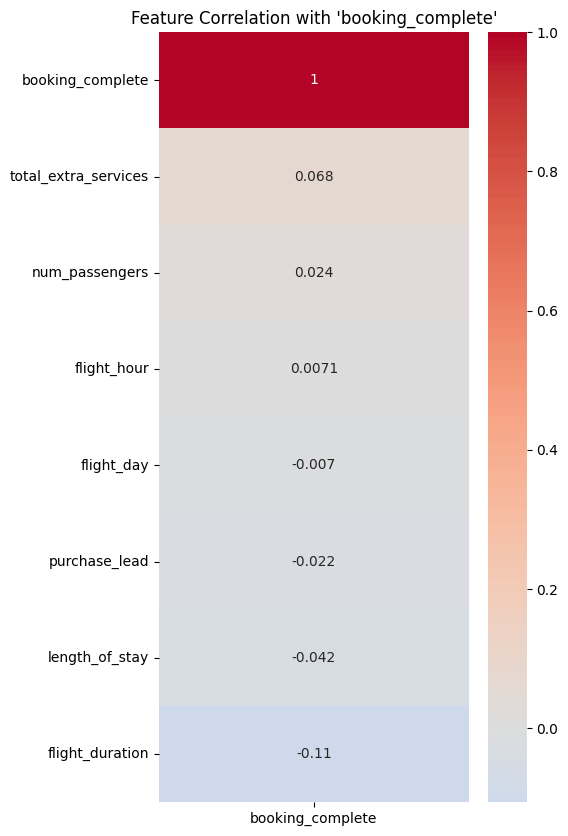

In [56]:
import seaborn as sns
correlation_with_label = df.corr()[['booking_complete']].sort_values(by='booking_complete', ascending=False)

# Set up the matplotlib figure
plt.figure(figsize=(5, 10))

# Draw the heatmap
sns.heatmap(correlation_with_label, annot=True, cmap="coolwarm", center=0)

plt.title("Feature Correlation with 'booking_complete'")
plt.show()


##Data Preparation for Modeling


One-Hot Encoding

In [57]:
import pandas as pd

# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['sales_channel', 'trip_type', 'route', 'booking_origin'])

# Display the head of the encoded dataset
print(df_encoded.head())


   num_passengers  purchase_lead  length_of_stay  flight_hour  flight_day  \
0               2            262              19            7           6   
1               1            112              20            3           6   
2               2            243              22           17           3   
3               1             96              31            4           6   
4               2             68              22           15           3   

   flight_duration  booking_complete  total_extra_services  \
0             5.52                 0                     1   
1             5.52                 0                     0   
2             5.52                 0                     2   
3             5.52                 0                     1   
4             5.52                 0                     2   

   sales_channel_Internet  sales_channel_Mobile  ...  \
0                       1                     0  ...   
1                       1                     0  ...

In [59]:
from sklearn.preprocessing import StandardScaler

# Selecting the numeric columns for scaling
numeric_columns = df_encoded.select_dtypes(include=['float64', 'int64']).columns.difference(['booking_complete'])

# Creating a new dataframe for scaled values
df_scaled = df_encoded.copy()
scaler = StandardScaler()
df_scaled[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Display the first few rows of the scaled dataframe
print(df_scaled.head())


   num_passengers  purchase_lead  length_of_stay  flight_hour  flight_day  \
0        0.400684       1.957530       -0.119353    -0.381764    1.096754   
1       -0.579559       0.299164       -0.089844    -1.120780    1.096754   
2        0.400684       1.747470       -0.030824     1.465775   -0.408687   
3       -0.579559       0.122272        0.234761    -0.936026    1.096754   
4        0.400684      -0.187290       -0.030824     1.096267   -0.408687   

   flight_duration  booking_complete  total_extra_services  \
0        -1.174175                 0             -0.391410   
1        -1.174175                 0             -1.387668   
2        -1.174175                 0              0.604848   
3        -1.174175                 0             -0.391410   
4        -1.174175                 0              0.604848   

   sales_channel_Internet  sales_channel_Mobile  ...  \
0                       1                     0  ...   
1                       1                     0  ...

### Model Training

choosing random forest for it's feature importance selection feature

model selection

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Initialize models
lr = LogisticRegression(max_iter=10000) # Increasing max_iter for convergence
rf = RandomForestClassifier()

Hyperparameter Tuning

In [66]:


# Hyperparameters for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Grid Search
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')

In [67]:
X = df_scaled.drop("booking_complete", axis=1)
y = df_scaled["booking_complete"]

grid_search_rf.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

model evaluation

In [68]:
scores_rf = cross_val_score(grid_search_rf.best_estimator_, X, y, cv=5, scoring='accuracy')

print(f"Random Forest Average Accuracy: {np.mean(scores_rf):.2f}")

Random Forest Average Accuracy: 0.85


feature importance

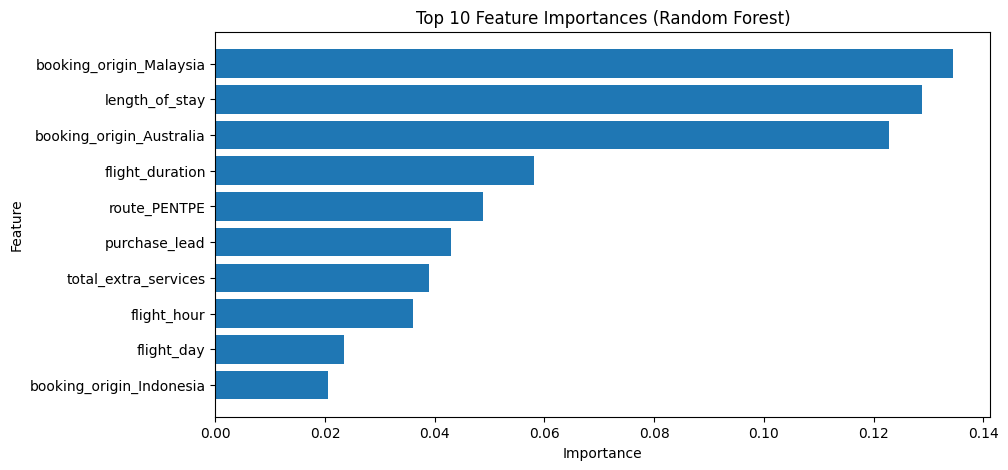

In [69]:
# Getting feature importance for Random Forest
feature_importances = grid_search_rf.best_estimator_.feature_importances_

# Plotting
features = list(X.columns)
importances = pd.DataFrame({'feature': features, 'importance': feature_importances})
importances = importances.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 5))
plt.barh(importances['feature'][:10], importances['importance'][:10]) # top 10 features
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.gca().invert_yaxis()
plt.show()
